# ERCEMAPI 2022

## Minicurso **Introdução às Redes Neurais Profundas**

## Parte III - Redes Neurais Profundas (em Keras) 

Prof. Josenildo C. da Silva (IFMA)

Prof. Raimundo Osvaldo Vieira (IFMA)


# Setup

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Redes Neurais Profundas

### Convolução 

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) #
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
filters = np.zeros(shape=(7, 7, 1,2), dtype=np.float32)
filters[:, 3, :,0] = 1 # vertical line
filters[3, :, :,1] = 1 # horizontal line

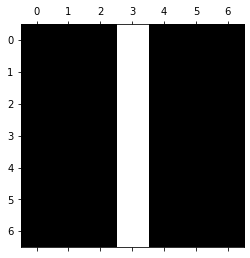

In [4]:
plt.matshow(filters[:,:,0,0],cmap='gray') # filtro vertical

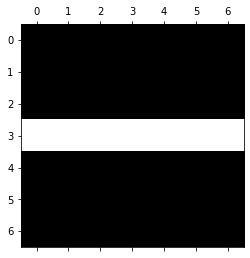

In [5]:
plt.matshow(filters[:,:,0,1],cmap='gray') # filtro vertical

In [6]:
outputs = tf.nn.conv2d(train_images[:10], filters, strides=(1,1,1,1), padding="SAME")
outputs.shape

TensorShape([10, 28, 28, 2])

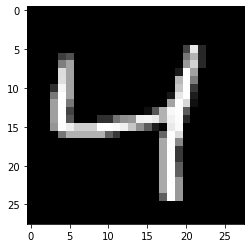

In [12]:
plt.imshow(train_images[2,:,:,0],cmap='gray')

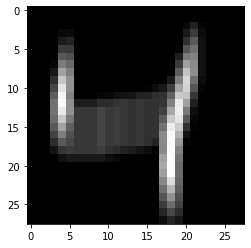

In [ ]:
plt.imshow(outputs[2, :, :,0], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

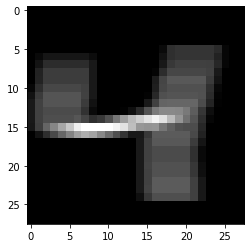

In [ ]:
plt.imshow(outputs[2, :, :,1], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

## ReLU

In [13]:
output_relu = tf.nn.relu(outputs)

In [14]:
output_relu.shape

TensorShape([10, 28, 28, 2])

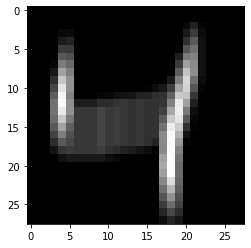

In [15]:
plt.imshow(output_relu[2, :, :,0], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

## MaxPooling

In [16]:
output = tf.nn.max_pool(outputs,ksize=2,strides=(1,2,2,1),padding="SAME")

In [17]:
output.shape

TensorShape([10, 14, 14, 2])

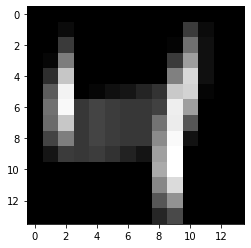

In [18]:
plt.imshow(output[2, :, :,0], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

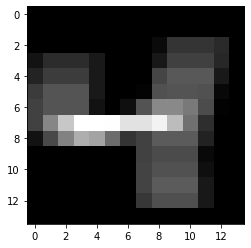

In [19]:
plt.imshow(output[2, :, :,1], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

# Exemplo (Chollet, 2021. Cap. 8)

In [20]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
train_images = train_images.reshape((60000, 28, 28, 1)) #
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [23]:
partial_train_images = train_images[:50000]
partial_train_labels = train_labels[:50000]
valid_images = train_images[50000:]
valid_labels = train_labels[50000:]

In [24]:
print(partial_train_images.shape)
print(valid_images.shape)
print(partial_train_labels.shape)
print(valid_labels.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(50000,)
(10000,)


In [25]:
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

In [27]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [29]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [30]:
history = model.fit(partial_train_images, partial_train_labels, epochs=5, batch_size=64,validation_data=(valid_images,valid_labels))

Epoch 1/5
782/782 [==============================] - 6s 5ms/step - loss: 0.1788 - accuracy: 0.9446 - val_loss: 0.0682 - val_accuracy: 0.9796
Epoch 2/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0459 - val_accuracy: 0.9850
Epoch 3/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0450 - val_accuracy: 0.9886
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0410 - val_accuracy: 0.9880
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0471 - val_accuracy: 0.9877


In [31]:
import pandas as pd

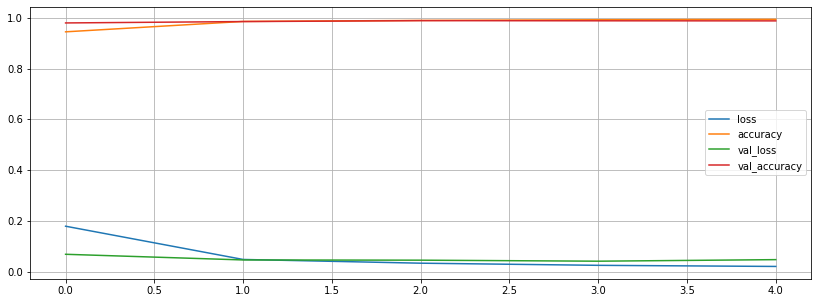

In [32]:
pd.DataFrame(history.history).plot(figsize=(14, 5)).plot()
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
eval_results = model.evaluate(test_images, test_labels,batch_size=64)

157/157 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9901


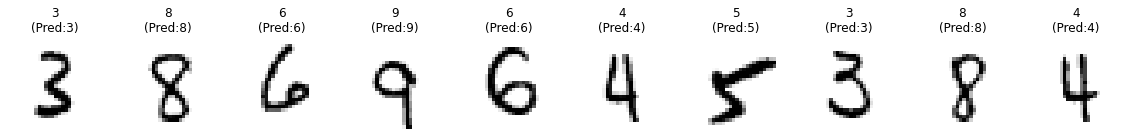

In [34]:
X_new = valid_images[:10]
Y_new = valid_labels[:10]
y_pred = model.predict(X_new)
classes_pred = np.argmax(y_pred, axis=1)
r=0
fig,axes = plt.subplots(nrows=1,ncols=10,figsize=(20,12))
for ax in axes:
    some_image =X_new[r].reshape(28,28)
    ax.imshow(X=some_image, cmap = "binary", interpolation="nearest")
    ax.set_title(str(Y_new[r])+ "\n(Pred:" +str(classes_pred[r])+")")
    ax.axis("off")
    r+=1
#plt.axis("off")
plt.show()

# Exemplo Cats vs Dogs

In [35]:
import tensorflow_datasets as tfds

In [36]:
classNames = ['cat', 'dog']


In [37]:
split=['train[:70%]', 'train[70%:85%]', 'train[85%:]']

In [38]:
trainDataset, validDataset,testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteE31KVF/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


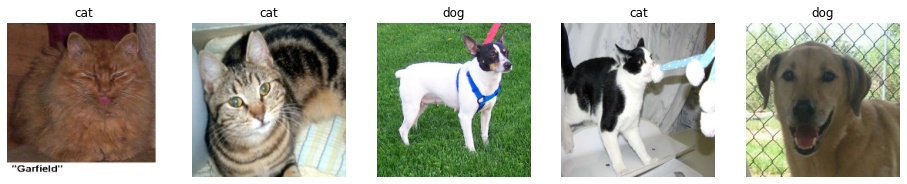

In [97]:
i = 0
fig, ax = plt.subplots(1, 5,figsize=(16,5))
images = testDataset.take(5)
for image, label in images:
    ax[i].axis('off')
    ax[i].set_title(classNames[label[0]])
    ax[i].imshow(image[0])
    i += 1
plt.show()

In [40]:
HEIGHT, WIDTH = 200,200

In [41]:
def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label

In [42]:
trainDataset = trainDataset.map(preprocess).batch(32)
validDataset = validDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

In [43]:
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.2),])

In [44]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [45]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
trainHistory = model.fit(trainDataset, epochs=15,validation_data=validDataset)

Epoch 1/15
509/509 [==============================] - 31s 56ms/step - loss: 0.7076 - accuracy: 0.5638 - val_loss: 0.6488 - val_accuracy: 0.6335
Epoch 2/15
509/509 [==============================] - 29s 57ms/step - loss: 0.6213 - accuracy: 0.6638 - val_loss: 0.5576 - val_accuracy: 0.7143
Epoch 3/15
509/509 [==============================] - 28s 55ms/step - loss: 0.5702 - accuracy: 0.7071 - val_loss: 0.5557 - val_accuracy: 0.7255
Epoch 4/15
509/509 [==============================] - 28s 54ms/step - loss: 0.5395 - accuracy: 0.7376 - val_loss: 0.4760 - val_accuracy: 0.7797
Epoch 5/15
509/509 [==============================] - 28s 54ms/step - loss: 0.5029 - accuracy: 0.7634 - val_loss: 0.4530 - val_accuracy: 0.7960
Epoch 6/15
509/509 [==============================] - 29s 56ms/step - loss: 0.4811 - accuracy: 0.7750 - val_loss: 0.4331 - val_accuracy: 0.8017
Epoch 7/15
509/509 [==============================] - 28s 55ms/step - loss: 0.4631 - accuracy: 0.7932 - val_loss: 0.4200 - val_accuracy:

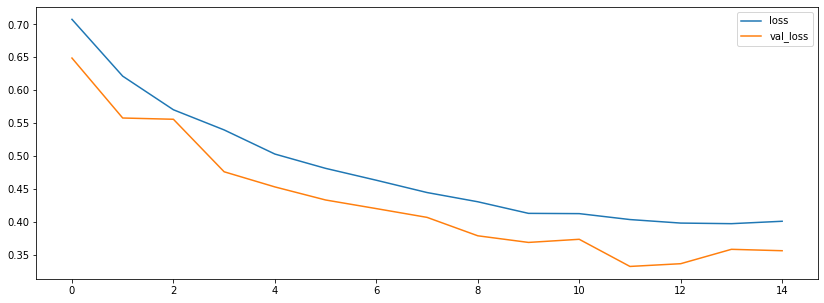

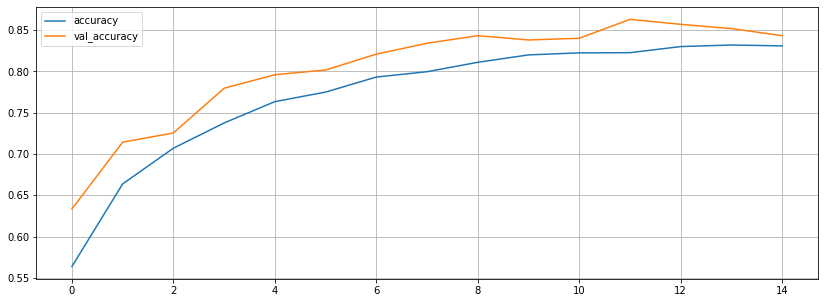

In [47]:
h = pd.DataFrame(trainHistory.history)
h[['loss','val_loss']].plot(figsize=(14, 5)).plot()
h[['accuracy','val_accuracy']].plot(figsize=(14, 5)).plot()
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [48]:
model.evaluate(testDataset)

110/110 [==============================] - 5s 42ms/step - loss: 0.3465 - accuracy: 0.8507


[0.34648966789245605, 0.8506735563278198]

In [100]:
images = testDataset.take(30)

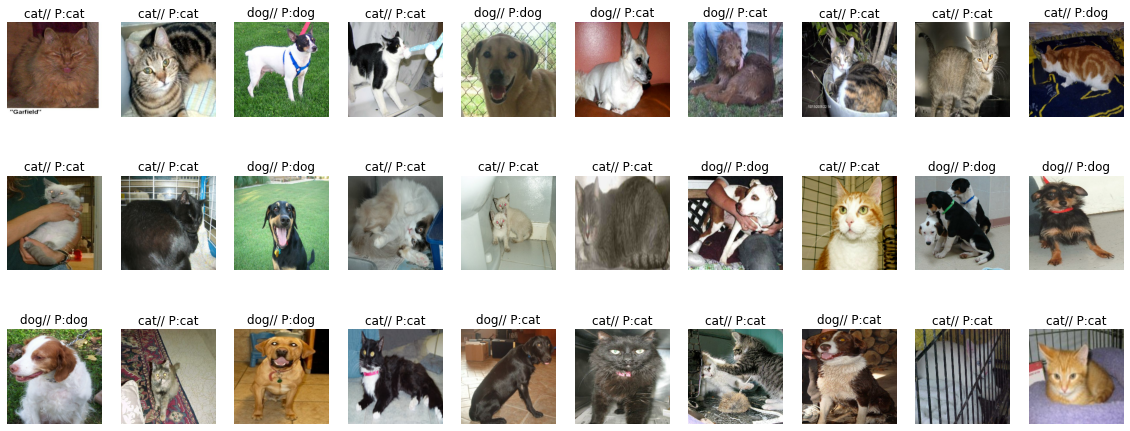

In [112]:
i = 0
fig, ax = plt.subplots(3, 10,figsize=(20,8))
for image, rotulo in images:
    prediction = model.predict(image)
    predictedLabel = prediction[0] >0.5
    ax[i//10][i%10].axis('off')
    ax[i//10][i%10].set_title(classNames[rotulo[0]]+"// P:"+classNames[int(predictedLabel)])
    #ax[i//10][i%10].set_title(classNames[rotulo[0]])
    ax[i//10][i%10].imshow(image[0])
    i += 1

#plt.show()

# Referências
- Chollet (2021) Cap. 8
- https://poloclub.github.io/cnn-explainer/
- https://lindevs.com/classify-images-of-dogs-and-cats-using-cnn-and-tensorflow-2